# Overview

Hi again, I am Jalal. This is my individual project from scraping Sociolla official website ( No.1 beauty and personal care e-commerce player in Indonesia )

Company Info ( last updated Dec 15, 2021 )
- Founded : 2014
- Headquarters : West Jakarta, Jakarta
- Total employess : 776
- Website : http://www.sociolla.com

In 2019, Sociolla through Social Bella was awarded as Disruptor Award for the A-List: Forbes Indonesia’s Most Promising Growth-Stage Startups 2019 together with new rising startups. This year, Chrisanti Indiana, the Co-Founder & Chief Marketing Officer is also listed in the Forbes' 30 Under 30 Asia version

Here, I'm gonna make some analysis about products which available in their website

I also create a different notebook for each category product

_Color Palette_

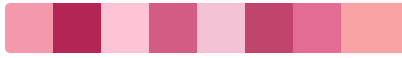

- #f499ab
- #b42454
- #fcc4d4
- #e46c94

In [74]:
palette = ['#b42454','#f499ab','#fcc4d4','#f8a4a4','#e46c94']

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

In [76]:
pd.set_option('display.max_columns',100)
rcParams['axes.grid'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.rc('axes',axisbelow=True)

In [77]:
eyes = pd.read_csv('D:/Data/Sociolla/makeup_eyes.csv')
face = pd.read_csv('D:/Data/Sociolla/makeup_face.csv')
lips = pd.read_csv('D:/Data/Sociolla/makeup_lips.csv')

#skincare
mask = pd.read_csv('D:/Data/Sociolla/skincare_mask.csv')
treatment = pd.read_csv('D:/Data/Sociolla/skincare_treatment.csv')
cleanser = pd.read_csv('D:/Data/Sociolla/skincare_cleanser.csv')
moisturizer = pd.read_csv('D:/Data/Sociolla/skincare_moisturizer.csv')
suncare = pd.read_csv('D:/Data/Sociolla/skincare_suncare.csv')

#haircare
shampo = pd.read_csv('D:/Data/Sociolla/haircare_shampoo.csv')
h_treatment = pd.read_csv('D:/Data/Sociolla/haircare_hairtreatment.csv')


#bodybath
bodycare = pd.read_csv('D:/Data/Sociolla/bodybath_bodycare.csv')
bodycleanser = pd.read_csv('D:/Data/Sociolla/bodybath_bodycleanser.csv')
others = pd.read_csv('D:/Data/Sociolla/bodybath_others.csv')
b_treatment = pd.read_csv('D:/Data/Sociolla/bodybath_treatment.csv')
#accessories
organizer = pd.read_csv('D:/Data/Sociolla/accessories_organizer.csv')
menipedi  = pd.read_csv('D:/Data/Sociolla/accessories_menipedi.csv')

Create functions to create category and subcategory columns
- Those variables can be used to deep-dive analysis each product category 

In [78]:
def makeup(cat,sub):
    cat['category'] = 'makeup'
    cat.insert(7,'sub_category',sub)
def skincare(cat1,sub1):
    cat1['category'] = 'skincare'
    cat1.insert(7,'sub_category',sub1)
def haircare(cat2,sub2):
    cat2['category'] = 'haircare'
    cat2.insert(7,'sub_category',sub2)
def bodybath(cat3,sub3):
    cat3['category'] = 'bodybath'
    cat3.insert(7,'sub_category',sub3)
def accessories(cat4,sub4):
    cat4['category'] = 'accessories'
    cat4.insert(7,'sub_category',sub4)

In [79]:
makeup(eyes,'eyes')
makeup(face,'face')
makeup(lips,'lips')

skincare(mask,'mask')
skincare(treatment,'treatment')
skincare(cleanser,'cleanser')
skincare(moisturizer,'moisturizer')
skincare(suncare,'suncare')

haircare(shampo,'shampoo')
haircare(h_treatment,'hair_treatment')

accessories(organizer,'organizer')
accessories(menipedi,'meni_pedi')

bodybath(bodycleanser,'cleanser')
bodybath(others,'others')
bodybath(b_treatment,'treatment')
bodybath(bodycare,'bodycare')

# Grouping

Let's take a first simple step to clean some values

In [80]:
def clean(na):
    
    idx_w_comma1  = np.array(na.loc[na[(na.number_of_reviews.str.contains('k'))&(na.number_of_reviews.str.contains(','))].index,'number_of_reviews'].index).tolist()
    idx_w_comma3  = np.array(na.loc[na[(na.repurchase_yes.str.contains('k'))&(na.repurchase_yes.str.contains(','))].index,'repurchase_yes'].index).tolist()
    idx_w_comma4  = np.array(na.loc[na[(na.repurchase_no.str.contains('k'))&(na.repurchase_no.str.contains(','))].index,'repurchase_no'].index).tolist()
    idx_w_comma5  = np.array(na.loc[na[(na.repurchase_maybe.str.contains('k'))&(na.repurchase_maybe.str.contains(','))].index,'repurchase_maybe'].index).tolist()
    
    
    # Change 'k' into double 0 ( because they have decimal value )
    na.loc[idx_w_comma1,'number_of_reviews'] = na.loc[idx_w_comma1,'number_of_reviews'].replace({',':'','k':'00'},regex=True)
    na.loc[idx_w_comma3,'repurchase_yes'] = na.loc[idx_w_comma3,'repurchase_yes'].replace({',':'','k':'00'},regex=True)
    na.loc[idx_w_comma4,'repurchase_no'] = na.loc[idx_w_comma4,'repurchase_no'].replace({',':'','k':'00'},regex=True)
    na.loc[idx_w_comma5,'repurchase_maybe'] = na.loc[idx_w_comma5,'repurchase_maybe'].replace({',':'','k':'00'},regex=True)
    
    # Change 'k' into triple 0
    na.loc[na.number_of_reviews.dropna()[na.number_of_reviews.str.contains('k').dropna()].index,'number_of_reviews'] = na.loc[na.number_of_reviews.dropna()[na.number_of_reviews.str.contains('k').dropna()].index,'number_of_reviews'].replace({'k':'000'},regex=True)
    na.loc[na.repurchase_yes.dropna()[na.repurchase_yes.str.contains('k').dropna()].index,'repurchase_yes'] = na.loc[na.repurchase_yes.dropna()[na.repurchase_yes.str.contains('k').dropna()].index,'repurchase_yes'].replace({'k':'000'},regex=True)
    na.loc[na.repurchase_no.dropna()[na.repurchase_no.str.contains('k').dropna()].index,'repurchase_no'] = na.loc[na.repurchase_no.dropna()[na.repurchase_no.str.contains('k').dropna()].index,'repurchase_no'].replace({'k':'000'},regex=True)
    na.loc[na.repurchase_maybe.dropna()[na.repurchase_maybe.str.contains('k').dropna()].index,'repurchase_maybe'] = na.loc[na.repurchase_maybe.dropna()[na.repurchase_maybe.str.contains('k').dropna()].index,'repurchase_maybe'].replace({'k':'000'},regex=True)
    
    # Finalization
    na.replace({'repurchase_yes':{'Yes ':''},
                'repurchase_no' :{'No ':''},
                'repurchase_maybe':{'Maybe ':''}
               },regex=True,inplace=True)
    
    na['repurchase_yes']= na['repurchase_yes'].str[1:-1].astype(float)
    na['repurchase_no'] = na['repurchase_no'].str[1:-1].astype(float)
    na['repurchase_maybe'] = na['repurchase_maybe'].str[1:-1].astype(float)
    na['number_of_reviews'] = na['number_of_reviews'].str[1:-1].astype(float)

In [81]:
makeup = pd.concat([eyes,face,lips]).reset_index(drop=True).iloc[:,3:].rename({'link-href':'link'},axis=1)
clean(makeup)
makeup.to_csv('D:/Data/Sociolla/group/makeup.csv',index=False)

In [82]:
skincare = pd.concat([mask,treatment,cleanser,moisturizer,suncare]).reset_index(drop=True).iloc[:,3:].rename({'link-href':'link'},axis=1)
clean(skincare)
skincare.to_csv('D:/Data/Sociolla/group/skincare.csv',index=False)

In [83]:
haircare = pd.concat([shampo,h_treatment]).reset_index(drop=True).iloc[:,3:].rename({'link-href':'link'},axis=1)
clean(haircare)
haircare.to_csv('D:/Data/Sociolla/group/haircare.csv',index=False)

In [84]:
accessories = pd.concat([organizer,menipedi]).reset_index(drop=True).iloc[:,3:].rename({'link-href':'link'},axis=1)
clean(accessories)
accessories.to_csv('D:/Data/Sociolla/group/accessories.csv',index=False)

In [85]:
bodybath = pd.concat([bodycleanser,others,bodycare,b_treatment]).reset_index(drop=True).iloc[:,3:].rename({'link-href':'link'},axis=1)
clean(bodybath)
bodybath.to_csv('D:/Data/Sociolla/group/bodybath.csv',index=False)

In [86]:
df = pd.concat([makeup,skincare,haircare,accessories,bodybath],axis=0).reset_index(drop=True)

There are so many wrong formats in price column of each category. Instead of concat the data directly, we're gonna analyze all of them by each category in different notebook 

- Why ? 

In my opinion, there are some values that we have to check the price manually from the website. Thus, from there, we can see the results more efficient and clearly

In [87]:
df.to_csv('D:/Data/Sociolla/group/full.csv',index=False)